# Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
import sys

# Add ../src to the path
proj_path = os.path.abspath(os.path.join(os.getcwd(), "../src"))
sys.path.insert(0, proj_path)

# Import the parse config function to parse the .toml file
from utils.config_tool import parse_config

# Load the config file
config = parse_config("../config/trade_w_llm.toml")
local_path = os.path.join(config['info']['local_data_path'], 'evaluation')
print(local_path)

/Users/xiaokangwang/Documents/PycharmProjects/Projects for Erdos 2025 spring/dataset/evaluation


In [9]:
env = config['strategy']['environment']
file_name = f"final_results_{env}_"
file_type = ".csv"

file_names = [f for f in os.listdir(local_path) if f.startswith(file_name) and f.endswith(file_type)]
if not file_names:
    raise FileNotFoundError(f"No model files found for {model_name}")
    
# Sort files by modification time (newest first)
files = sorted(file_names, key=lambda x: os.path.getmtime(os.path.join(local_path, x)), reverse=True)
latest_file_path = os.path.join(local_path, files[0])
print(latest_file_path)

/Users/xiaokangwang/Documents/PycharmProjects/Projects for Erdos 2025 spring/dataset/evaluation/final_results_single_20250424_001728.csv


In [10]:
# Load the data
df = pd.read_csv(latest_file_path)

In [11]:
df

,Unnamed: 0,market_navs,market_returns,DDQN_navs,DDQN_returns,DDQN_actions,PPO_navs,PPO_returns,PPO_actions,A2C_navs,A2C_returns,A2C_actions
0,0,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0
1,1,0.980430,-0.019570,1.000000,-0.000000,1.0,1.000000,-0.000000,1.0,1.000000,-0.000000,1.0
2,2,0.939052,-0.042205,0.957795,-0.042205,1.0,0.957795,-0.042205,1.0,0.957795,-0.042205,1.0
3,3,0.944017,0.005288,0.962860,0.005288,0.0,0.962860,0.005288,1.0,0.962860,0.005288,1.0
4,4,0.959303,0.016192,0.962860,0.000000,0.0,0.978451,0.016192,1.0,0.978451,0.016192,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1756,1756,5.609327,-0.002798,1.049204,0.002798,-1.0,10.080926,-0.002798,1.0,1.232660,-0.000000,0.0
1757,1757,5.531478,-0.013878,1.063765,0.013878,-1.0,9.941019,-0.013878,1.0,1.232660,-0.000000,0.0
1758,1758,5.361744,-0.030685,1.096407,0.030685,-1.0,9.635977,-0.030685,1.0,1.232660,-0.000000,0.0
1759,1759,5.513612,0.028324,1.065352,-0.028324,-1.0,9.908910,0.028324,1.0,1.232660,0.000000,0.0


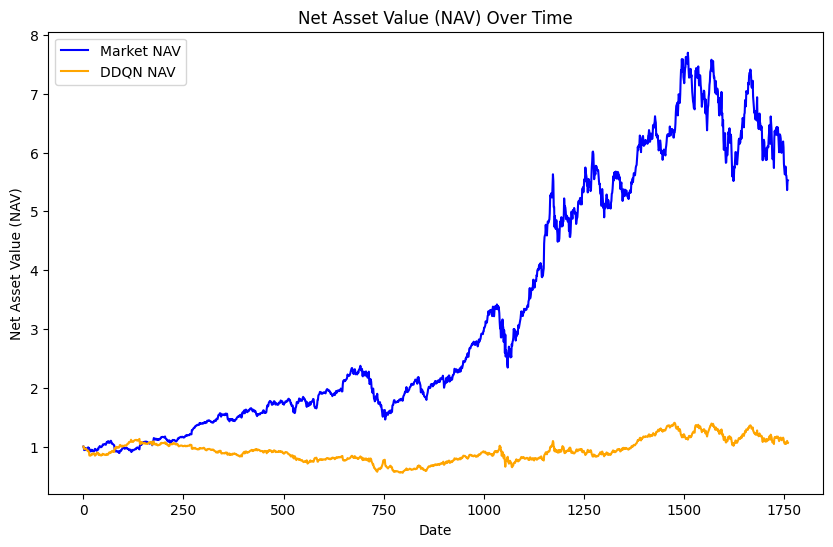

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['market_navs'], label='Market NAV', color='blue')
plt.plot(df.index, df['DDQN_navs'], label='DDQN NAV', color='orange')
#plt.plot(df.index, df['PPO_navs'], label='PPO NAV', color='green')
#plt.plot(df.index, df['A2C_navs'], label='A2C NAV', color='red')
plt.xlabel('Date')
plt.ylabel('Net Asset Value (NAV)')
plt.title('Net Asset Value (NAV) Over Time')
plt.legend()

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['DD'])